# Euler
---

In [51]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from quantum_mechanics import WaveFunction
from utils import box_potential

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [267]:
import palettable as pl
emr = pl.cartocolors.sequential.Emrld_7.get_mpl_colormap()

In [52]:
N = 2000 # spatial discretization
Nt = 1000 # temporal discretization
n = np.arange(N) # for n-related stuff
x = np.linspace(0,1, N) # the spatial axis
t = np.linspace(0, 1, Nt) # temporal axis

potential_strength = 1e3
V = box_potential(N, potential_strength)

In [53]:
%time wave = WaveFunction(N, V)
%time wave.construct_hamiltonian()
%time wave.solve_eigenvalues()

Wall time: 1.15 ms
Wall time: 1 ms
Wall time: 2.91 s


Set the initial state as $\psi_1$

In [54]:
%time wave.set_initial_state(wave.v[:,0])

Initial state set. Normalization: (1+0j)
Wall time: 972 µs


In [155]:
dt =0.001

Wall time: 31.9 ms


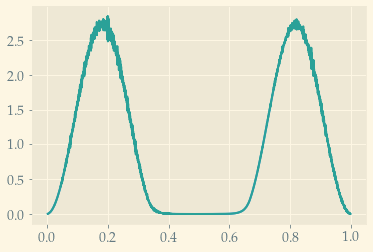

In [23]:
%time wave.euler(5, dt)
plt.plot(x, np.abs(wave.psi0)**2)
plt.plot(x, np.abs(wave.psi_euler)**2)

In [24]:
from utils import inner_product

In [25]:
inner_product(wave.psi_euler, wave.psi_euler)

(1.000383076681544+0j)

In [219]:
%%time
N_t = 50
N_x = 50

M_x = np.linspace(100, 3000, N_x, dtype=int) # discretization
M_t = 10**np.linspace(-6, -1, N_t)
steps_before_breakdown = np.zeros((N_x, N_t))
for i,n in enumerate(M_x):
    v_temp = box_potential(n, potential_strength)
    wf = WaveFunction(n, v_temp)
    wf.construct_hamiltonian()
    wf.solve_eigenvalues()
    wf.set_initial_state(wf.v[:,0])
    for j, dt in enumerate(M_t):
        count = 0
        wf.reset_euler()
        wf.euler(0,dt)
        while inner_product(wf.psi_euler, wf.psi_euler) < 2:
            count +=1
            wf.euler(1, dt)
        steps_before_breakdown[i,j] = count
#         print(i,j, count)
np.save(f"steps_before_breakdown_{N_t}_{N_x}", steps_before_breakdown)

Initial state set. Normalization: (0.9999999999999998+0j)
Initial state set. Normalization: (0.9999999999999999+0j)
Initial state set. Normalization: (0.9999999999999998+0j)
Initial state set. Normalization: (1.0000000000000002+0j)
Initial state set. Normalization: (0.9999999999999989+0j)
Initial state set. Normalization: (0.9999999999999994+0j)
Initial state set. Normalization: (1+0j)
Initial state set. Normalization: (0.9999999999999996+0j)
Initial state set. Normalization: (1.0000000000000002+0j)
Initial state set. Normalization: (1.0000000000000004+0j)
Initial state set. Normalization: (1.0000000000000004+0j)
Initial state set. Normalization: (1.0000000000000004+0j)
Initial state set. Normalization: (1.0000000000000004+0j)
Initial state set. Normalization: (0.9999999999999999+0j)
Initial state set. Normalization: (0.9999999999999994+0j)
Initial state set. Normalization: (1+0j)
Initial state set. Normalization: (1+0j)
Initial state set. Normalization: (0.9999999999999998+0j)
Initial

In [260]:
%%time
ddx = 1/M_x
cfl =[]
cfl_n =[]
for i in range(len(ddx)):
    for j in range(len(M_t)):
        if steps_before_breakdown[i,j] > 1:
            cfl.append(M_t[j] / (ddx[i])**2)
            cfl_n.append(steps_before_breakdown[i,j])

Wall time: 4.91 ms


In [261]:
A = [n for _,n in sorted(zip(cfl, cfl_n))]

In [262]:
B = sorted(cfl)

Text(0.5, 0, "$\\frac{\\Delta t'}{(\\Delta x')^2}$")

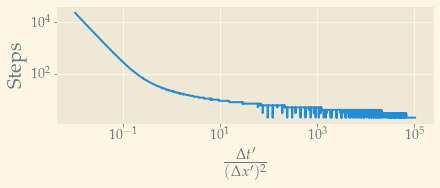

In [283]:
plt.figure(figsize=(6, 2.5), constrained_layout=True)
plt.loglog(B, A,'-')
plt.ylabel(fr"Steps", size=20)
plt.xlabel(fr"$\frac{{\Delta t'}}{{(\Delta x')^2}}$", size=20)

# Crank-Nicolson
---